Identifying and Recommending Best Restaurants
Project 1 

DESCRIPTION

Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

 

 Domain: Marketing

Read the information given below and also refer to the data dictionary provided separately in an excel file to build your understanding.

Problem Statement
A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

 

Approach:
1. Data Preliminary analysis:

Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.
Based on the findings from the previous questions identify duplicates and remove them.
2. Prepare a preliminary report of the given data by answering following questions.
Expressing the results using graphs and plot will make it more appealing.

Explore the geographical distribution of the restaurants, finding out the cities with maximum / minimum number of restaurants.
Explore how ratings are distributed overall.
Restaurant franchise is a thriving venture. So, it becomes very important to explore the franchise with most national presence.
What is the ratio between restaurants that allow table booking vs that do not allow table booking?
What is the percentage of restaurants providing online delivery?
Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?
What are the top 10 cuisines served across cities?
What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings
Discuss the cost vs the other variables.
Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.
All the information gathered here will lead to a better understanding of the data and allow for a better implementation of ML models.

#### Project Task: Week 1

#### Importing, Understanding, and Inspecting Data :

In [1]:
import pandas as pd
import numpy as np

#### Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.shape

(9551, 19)

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [5]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
data.duplicated().any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
cd = pd.read_excel('Country-Code.xlsx')

In [9]:
cd

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [10]:
data = pd.merge(data,cd)

In [11]:
data.duplicated().any()

False

In [12]:
data.shape

(9551, 20)

In [13]:
data.columns = ['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country']

In [14]:
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [15]:
data.columns.astype('object')

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Price_range           9551 non-null   int64  
 15  Aggregate_rating     

#### Based on the findings from the previous questions, identify duplicates and remove them


In [17]:
data.isnull().sum()

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [18]:
data[data['Restaurant_Name'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
1603,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [19]:
data.dropna(axis=0, subset=['Restaurant_Name'],inplace=True)

In [20]:
data.reset_index(drop=True,inplace=True)

In [21]:
data[data['Cuisines'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9178,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9181,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9189,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9415,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9503,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9513,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9537,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9539,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9543,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [22]:
data['Cuisines'].fillna('Others', inplace=True)

In [23]:
data.isnull().any()

Restaurant_ID           False
Restaurant_Name         False
Country_Code            False
City                    False
Address                 False
Locality                False
Locality_Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average_Cost_for_two    False
Currency                False
Has_Table_booking       False
Has_Online_delivery     False
Price_range             False
Aggregate_rating        False
Rating_color            False
Rating_text             False
Votes                   False
Country                 False
dtype: bool

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9550 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9550 non-null   int64  
 3   City                  9550 non-null   object 
 4   Address               9550 non-null   object 
 5   Locality              9550 non-null   object 
 6   Locality_Verbose      9550 non-null   object 
 7   Longitude             9550 non-null   float64
 8   Latitude              9550 non-null   float64
 9   Cuisines              9550 non-null   object 
 10  Average_Cost_for_two  9550 non-null   int64  
 11  Currency              9550 non-null   object 
 12  Has_Table_booking     9550 non-null   object 
 13  Has_Online_delivery   9550 non-null   object 
 14  Price_range           9550 non-null   int64  
 15  Aggregate_rating     

#### Performing EDA:

#### Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [25]:
data['City'].value_counts()

New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Paynesville          1
Randburg             1
Princeton            1
Yorkton              1
Name: City, Length: 141, dtype: int64

In [26]:
data.groupby(['City']).agg(count=('Restaurant_Name','count')).max()

count    5473
dtype: int64

In [27]:
data.groupby(['City']).agg(count=('Restaurant_Name','count')).min()

count    1
dtype: int64

In [28]:
#Country Wise Distribution
geo_country_wise_distr = data.groupby(['Country']).agg(count=('Restaurant_Name','count'))
geo_country_wise_distr.sort_values(by='count',ascending=False)

,count
Country,
India,8651
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


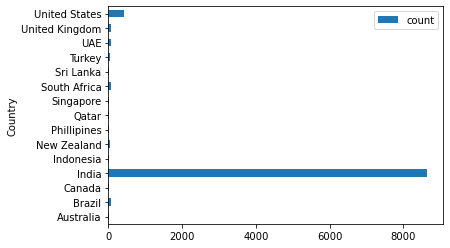

In [29]:
geo_country_wise_distr.plot(kind='barh');

In [30]:
city_wise_distr = data.groupby(['Country','City']).agg(count=('Restaurant_Name','count'))
city_wise_distr.sort_values(by='count',ascending=False)

count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

NewDelhi has max number of restaurants [ 5473 ] 


In [31]:
#now for min 
min_nbr_rest = city_wise_distr[city_wise_distr['count']==1]

#the cities with min number of restaurants 
min_nbr_rest

count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [32]:
min_nbr_rest.count()

count    46
dtype: int64

46 cities with min number of restaurants [1]


#### Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [33]:
geo_country_wise_distr = data.groupby(['Country','Restaurant_Name']).agg(count=('Restaurant_Name','count'))
geo_country_wise_distr.sort_values(by='count',ascending=False)

count
Country       Restaurant_Name        
India         Cafe Coffee Day      83
              Domino's Pizza       79
              Subway               63
              Green Chick Chop     51
              McDonald's           48
...                               ...
              Hawai Adda            1
              Havemore              1
              Haveliram             1
              Hauz Khas Social      1
United States Zunzi's               1

[7472 rows x 1 columns]

 As India has 8651 the maximum number of restaurant counts, so let's consider the case of India.
 The franchise with most national presence is Cafe Coffee Day [ 83 ] followed by Domino's Pizza [ 79 ], Subway [ 63 ], Green Chick Chop [ 51 ], McDonald's [ 48 ] in India.

### Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking

In [34]:
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [35]:
data['Has_Table_booking'].value_counts()

No     8392
Yes    1158
Name: Has_Table_booking, dtype: int64

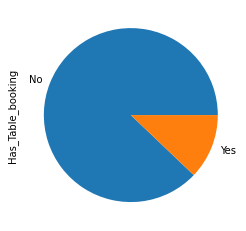

In [36]:
data['Has_Table_booking'].value_counts().plot(kind='pie');

In [37]:
do_not_allow_tbl =(data['Has_Table_booking']=='No').sum()

In [38]:
allow_tbl = (data['Has_Table_booking']=='Yes').sum()

In [39]:
ratio =round((allow_tbl/do_not_allow_tbl),2)

In [40]:
print('The ratio between restaurants that allow table booking vs. those that do not allow table booking is',ratio)

The ratio between restaurants that allow table booking vs. those that do not allow table booking is 0.14


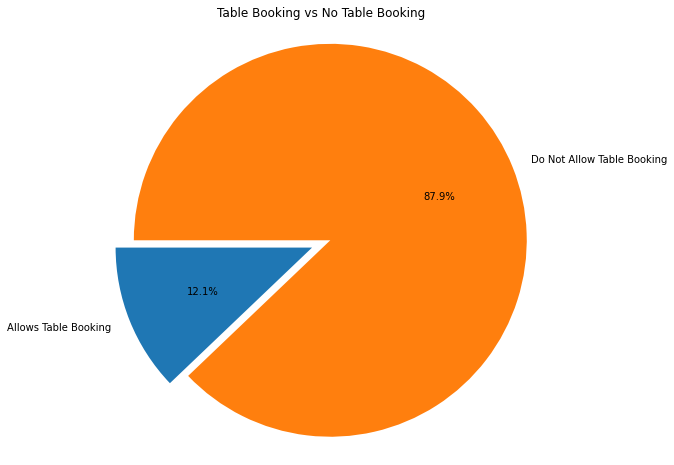

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = 'Allows Table Booking', 'Do Not Allow Table Booking'
sizes = [allow_tbl,do_not_allow_tbl]
explode = (0.1, 0) 
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=180)
ax1.set_title("Table Booking vs No Table Booking")
ax1.axis('equal')
plt.show()

### Find out the percentage of restaurants providing online delivery

In [42]:
data['Has_Online_delivery'].value_counts()

No     7099
Yes    2451
Name: Has_Online_delivery, dtype: int64

In [43]:
offline =(data['Has_Online_delivery']=='No').sum()
online = (data['Has_Online_delivery']=='Yes').sum()

In [44]:
total_ = offline + online

In [45]:
totalpercent_online = (round(((online/total_)*100),2))
totalpercent_online

25.66

In [46]:
print('The percentage of restaurants providing online delivery is',totalpercent_online,'% .')

The percentage of restaurants providing online delivery is 25.66 % .


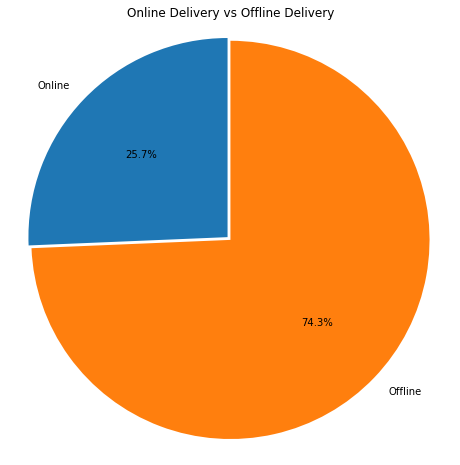

In [47]:
labels = 'Online', 'Offline'
sizes = [online,offline]
explode = (0.02, 0) 
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Online Delivery vs Offline Delivery")
ax1.axis('equal')
plt.show()

#### Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [48]:
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [49]:
data['Votes'].value_counts().sum()

9550

In [50]:
allow_tbl+online

3609

In [51]:
9550-3609

5941

In [52]:
offline_delv =data[data['Has_Online_delivery']=='No']['Votes'].sum()
online_delv =data[data['Has_Online_delivery']=='Yes']['Votes'].sum()

In [53]:
print(offline_delv)
print(online_delv)
print(offline_delv-online_delv)

979962
517914
462048


In [54]:
#difference in number of votes for the restaurants that deliver and the restaurants that do not deliver
print('Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver is',(offline_delv-online_delv))

Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver is 462048


#### Project Task: Week 2

Performing EDA:

### What are the top 10 cuisines served across cities?

In [55]:
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [56]:
#Splitting the 'Cuisines' column
cuisines_all = data['Cuisines'].apply(lambda x:pd.Series(x.split(',')))

In [57]:
cuisines_all

,0,1,2,3,4,5,6,7
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9545,Mexican,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9546,Italian,Mediterranean,Pizza,NaN,NaN,NaN,NaN,NaN
9547,Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
9548,Chinese,Canadian,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
cuisines_all.columns=['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines_all.head()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
cuisine_1_cnt = pd.DataFrame(cuisines_all['Cuisine_1'].value_counts()).reset_index()

cuisine_1_cnt = cuisine_1_cnt.rename(columns={'index':'Cuisines','Cuisine_1':'Counts'})

cuisine_1_cnt.head(10)

,Cuisines,Counts
0,North Indian,2991
1,Chinese,855
2,Fast Food,672
3,Bakery,621
4,Cafe,617
5,American,278
6,South Indian,262
7,Mithai,246
8,Street Food,236
9,Continental,235


In [60]:
cuisine_2_cnt = pd.DataFrame(cuisines_all['Cuisine_2'].value_counts()).reset_index()

cuisine_2_cnt = cuisine_2_cnt.rename(columns={'index':'Cuisines','Cuisine_2':'Counts'})

cuisine_2_cnt.head(10)

,Cuisines,Counts
0,Chinese,1156
1,Fast Food,820
2,North Indian,687
3,Mughlai,635
4,Desserts,407
5,Continental,244
6,Italian,240
7,South Indian,219
8,Street Food,216
9,Pizza,110


In [61]:
cuisine_3_cnt = pd.DataFrame(cuisines_all['Cuisine_3'].value_counts()).reset_index()

cuisine_3_cnt = cuisine_3_cnt.rename(columns={'index':'Cuisines','Cuisine_3':'Counts'})

cuisine_3_cnt.head(10)

,Cuisines,Counts
0,Chinese,594
1,Fast Food,385
2,Continental,193
3,North Indian,191
4,Italian,189
5,Mughlai,124
6,South Indian,123
7,Salad,70
8,Asian,64
9,Thai,50


In [62]:
cuisine_4_cnt = pd.DataFrame(cuisines_all['Cuisine_4'].value_counts()).reset_index()

cuisine_4_cnt = cuisine_4_cnt.rename(columns={'index':'Cuisines','Cuisine_4':'Counts'})

cuisine_4_cnt.head(10)

,Cuisines,Counts
0,Italian,84
1,Chinese,81
2,Fast Food,77
3,Healthy Food,67
4,North Indian,65
5,Street Food,59
6,Continental,50
7,Asian,31
8,Mithai,26
9,South Indian,25


In [63]:
cuisine_5_cnt = pd.DataFrame(cuisines_all['Cuisine_5'].value_counts()).reset_index()

cuisine_5_cnt = cuisine_5_cnt.rename(columns={'index':'Cuisines','Cuisine_5':'Counts'})

cuisine_5_cnt.head(10)

,Cuisines,Counts
0,Chinese,41
1,Fast Food,30
2,North Indian,23
3,Thai,20
4,Italian,13
5,Mithai,12
6,Continental,11
7,Mediterranean,11
8,Asian,9
9,Bakery,8


In [64]:
cuisine_6_cnt = pd.DataFrame(cuisines_all['Cuisine_6'].value_counts()).reset_index()

cuisine_6_cnt = cuisine_6_cnt.rename(columns={'index':'Cuisines','Cuisine_6':'Counts'})

cuisine_6_cnt.head(10)

,Cuisines,Counts
0,Mithai,23
1,Beverages,12
2,Lebanese,8
3,Chinese,8
4,Thai,5
5,Tea,4
6,Desserts,4
7,Cafe,4
8,Grill,3
9,Italian,3


In [65]:
cuisine_7_cnt = pd.DataFrame(cuisines_all['Cuisine_7'].value_counts()).reset_index()

cuisine_7_cnt = cuisine_7_cnt.rename(columns={'index':'Cuisines','Cuisine_7':'Counts'})

cuisine_7_cnt.head(10)

,Cuisines,Counts
0,Desserts,24
1,European,2
2,Mediterranean,2
3,Mithai,2
4,American,1
5,Rajasthani,1
6,Asian,1
7,Pizza,1
8,Lebanese,1
9,Bakery,1


In [66]:
cuisine_8_cnt = pd.DataFrame(cuisines_all['Cuisine_8'].value_counts()).reset_index()

cuisine_8_cnt = cuisine_8_cnt.rename(columns={'index':'Cuisines','Cuisine_8':'Counts'})

cuisine_8_cnt.head(10)

,Cuisines,Counts
0,Mithai,8
1,Finger Food,2
2,International,2
3,Mughlai,1
4,Beverages,1


In [67]:
Cuisines_app = cuisine_1_cnt.append([cuisine_2_cnt,cuisine_3_cnt,cuisine_4_cnt,cuisine_5_cnt,cuisine_6_cnt,cuisine_7_cnt,cuisine_8_cnt]) 

In [68]:
Cuisines_app['Cuisines']=Cuisines_app.Cuisines.str.replace(' ','')
Cuisines_app

,Cuisines,Counts
0,NorthIndian,2991
1,Chinese,855
2,FastFood,672
3,Bakery,621
4,Cafe,617
...,...,...
0,Mithai,8
1,FingerFood,2
2,International,2
3,Mughlai,1


In [69]:
grpof_cuisines = Cuisines_app.groupby('Cuisines').sum()
max_cuisines = grpof_cuisines.sort_values(by='Counts',ascending=False)

In [70]:
max_cuisines

,Counts
Cuisines,
NorthIndian,3959
Chinese,2735
FastFood,1986
Mughlai,995
Italian,763
...,...
Canadian,1
Mineira,1
SoulFood,1


In [71]:
top_10_cuisines_sac = (max_cuisines.head(10))
top_10_cuisines_sac

,Counts
Cuisines,
NorthIndian,3959
Chinese,2735
FastFood,1986
Mughlai,995
Italian,763
Bakery,745
Continental,735
Cafe,703
Desserts,653


### The top 10 cuisines served across cities are 
1. NorthIndian, 
2. Chinese, 
3. FastFood, 
4. Mughlai,
5. Italian, 
6. Bakery, 
7. Continental, 
8. Cafe, 
9. Desserts, 
10. SouthIndian

#### What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?

In [72]:
df = pd.DataFrame(data,columns=['Restaurant_Name','City','Cuisines'])
df

,Restaurant_Name,City,Cuisines
0,Skye,Jakarta,"Italian, Continental"
1,Satoo - Hotel Shangri-La,Jakarta,"Asian, Indonesian, Western"
2,Sushi Masa,Jakarta,"Sushi, Japanese"
3,3 Wise Monkeys,Jakarta,Japanese
4,Avec Moi Restaurant and Bar,Jakarta,"French, Western"
...,...,...,...
9545,Senor Iguanas,Pocatello,Mexican
9546,Lake House Restaurant,Vineland Station,"Italian, Mediterranean, Pizza"
9547,Tokyo Sushi,Chatham-Kent,"Japanese, Sushi"
9548,Consort Restaurant,Consort,"Chinese, Canadian"


In [73]:
Cuisine_Cnt_by_res=pd.DataFrame(df.groupby('Restaurant_Name').Cuisines.count()).reset_index()
Cuisine_Cnt_by_res.sort_values(by = 'Cuisines', ascending = False)

,Restaurant_Name,Cuisines
1098,Cafe Coffee Day,83
2098,Domino's Pizza,79
6105,Subway,63
2716,Green Chick Chop,51
4076,McDonald's,48
...,...,...
2617,Ghungroo Club & Bar - By Gautam Gambhir,1
2616,Ghar Ki Handi,1
2615,Ghar Ka Swad,1
2613,Ghar Bistro Cafe,1


#### The maximum  number of cuisines that a restaurant serves is 83 by Cafe Coffee Day, Followed by 79 by Dominos Pizza, 63 by Subway, and minimum is 1.

#### The most served cuisine across the restaurant for each city 

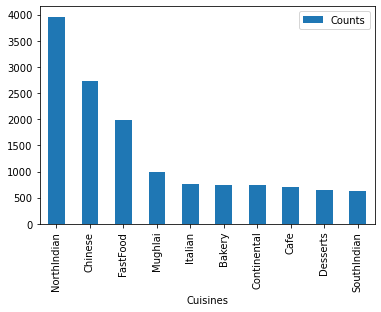

In [74]:
top_10_cuisines_sac.plot(kind='bar');

In [75]:
top_10_cuisines_sac

,Counts
Cuisines,
NorthIndian,3959
Chinese,2735
FastFood,1986
Mughlai,995
Italian,763
Bakery,745
Continental,735
Cafe,703
Desserts,653


#### The most served cuisine across the restaurant for each city is "NorthIndian" with count as 3959.

#### What is the distribution cost across the restaurants? 

Text(0, 0.5, 'Count of Restaruarnts')

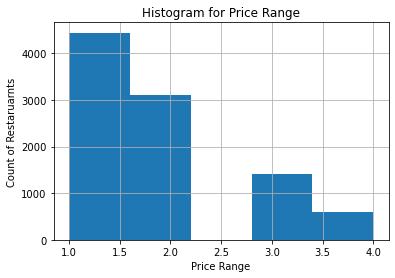

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

hist = data['Price_range'].hist(bins=5)
hist.set_title('Histogram for Price Range')
hist.set_xlabel('Price Range')
hist.set_ylabel('Count of Restaruarnts')

Text(0, 0.5, 'Count of Restaruarnts')

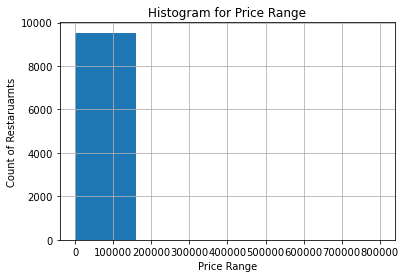

In [77]:
hist = data['Average_Cost_for_two'].hist(bins=5)
hist.set_title('Histogram for Price Range')
hist.set_xlabel('Price Range')
hist.set_ylabel('Count of Restaruarnts')

In [78]:
##  Distribution cost accross the restaurants
Cost_per_restaurants = pd.DataFrame(data.groupby('Restaurant_Name').Average_Cost_for_two.sum()).reset_index()
Cost_per_restaurants.sort_values(by = 'Average_Cost_for_two', ascending = False)

,Restaurant_Name,Average_Cost_for_two
5897,Skye,800000
5594,Satoo - Hotel Shangri-La,800000
6262,Talaga Sampireun,600000
6170,Sushi Masa,500000
41,3 Wise Monkeys,450000
...,...,...
7096,UrbanCrave,0
486,Atmosphere Grill Cafe Sheesha,0
1746,Cookie Shoppe,0
6691,The Latitude - Radisson Blu,0


In [79]:
# Restaurants wise distribution of cost - By Currencies
df=pd.DataFrame(data.groupby(['Currency','Restaurant_Name']).agg(Count = ('Average_Cost_for_two','sum'))).reset_index()
df.sort_values(by='Count', ascending = False)

,Currency,Restaurant_Name,Count
7219,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
7220,Indonesian Rupiah(IDR),Skye,800000
7222,Indonesian Rupiah(IDR),Talaga Sampireun,600000
7221,Indonesian Rupiah(IDR),Sushi Masa,500000
7208,Indonesian Rupiah(IDR),3 Wise Monkeys,450000
...,...,...,...
418,Dollar($),Royal Hotel,0
6558,Indian Rupees(Rs.),The Latitude - Radisson Blu,0
214,Dollar($),El Vaquero Mexican Restaurant,0
6351,Indian Rupees(Rs.),The BrewMaster,0


In [80]:
df.groupby(['Currency'], sort=False)['Count'].max()

Currency
Botswana Pula(P)            6000
Brazilian Real(R$)           460
Dollar($)                    500
Emirati Diram(AED)           750
Indian Rupees(Rs.)         55300
Indonesian Rupiah(IDR)    800000
NewZealand($)                200
Pounds(å£)                   230
Qatari Rial(QR)              550
Rand(R)                     3210
Sri Lankan Rupee(LKR)       4500
Turkish Lira(TL)             400
Name: Count, dtype: int64

In [81]:
# Currency wise highest cost accross restaurants
Max_cost=df.groupby('Currency')\
  .apply(lambda group: group[group.Count == group.Count.max()])\
  .reset_index(drop=True)

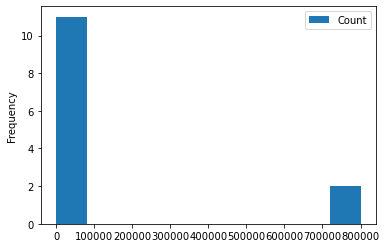

In [82]:
(Max_cost).plot(kind='hist');

In [83]:
Max_cost.sort_values(by='Count', ascending = False)

,Currency,Restaurant_Name,Count
5,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
6,Indonesian Rupiah(IDR),Skye,800000
4,Indian Rupees(Rs.),Domino's Pizza,55300
0,Botswana Pula(P),Spiral - Sofitel Philippine Plaza Manila,6000
11,Sri Lankan Rupee(LKR),The Manhattan Fish Market,4500
10,Rand(R),Restaurant Mosaic @ The Orient,3210
3,Emirati Diram(AED),Applebee's,750
9,Qatari Rial(QR),Vine - The St. Regis,550
2,Dollar($),Restaurant Andre,500
1,Brazilian Real(R$),Coco Bambu,460


In [125]:
Max_cost.to_excel('Max_cost.xlsx')

### Above table shows the currency wise distribution of cost across the restaurants
For eg. :
- Satoo - Hotel Shangri-La having avg_cost_for_two 800000 in Indonesian Rupiah(IDR)
- Skye having avg_cost_for_two 800000 in Indonesian Rupiah(IDR)
- Domino's Pizza having avg_cost_for_two 55300 in Indian Rupees(Rs.)

we can also examine further by converting it to specific currency, but this is sufficient for an overview as we just want to know the distribution of cost across the restaurants.

#### How ratings are distributed among the various factors?
#### Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.

In [84]:
data.head(2)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


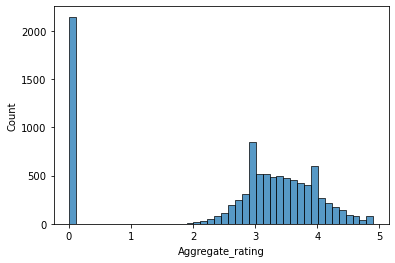

In [85]:
import seaborn as sns

sns.histplot(data['Aggregate_rating']);

In [86]:
dest_rating= data.groupby(['Aggregate_rating']).agg(count=("Restaurant_Name","count")).reset_index()
dest_rating.sort_values(by='Aggregate_rating',ascending=False)

,Aggregate_rating,count
32,4.9,61
31,4.8,25
30,4.7,42
29,4.6,78
28,4.5,95
27,4.4,144
26,4.3,174
25,4.2,221
24,4.1,273
23,4.0,266



From above graph & table we can see there are 2148 number of restaurants which do not have any ratings also  we have 61 number of restaurants which have the highest ratings as 4.9.

In [87]:
country_rating= data.groupby(['Country','Aggregate_rating']).agg(count=("Restaurant_Name","count")).reset_index()
country_rating.sort_values(by='Aggregate_rating',ascending=False)

,Country,Aggregate_rating,count
221,United States,4.9,14
92,New Zealand,4.9,2
139,South Africa,4.9,3
151,Sri Lanka,4.9,1
32,Brazil,4.9,3
...,...,...,...
38,India,1.8,1
200,United States,0.0,3
12,Brazil,0.0,5
180,United Kingdom,0.0,1


In [127]:
country_wise_ratng =country_rating[country_rating.Aggregate_rating >=4.9].reset_index()
country_wise_ratng = country_wise_ratng.sort_values(by='count',ascending=False)
country_wise_ratng

,index,Country,Aggregate_rating,count
1,69,India,4.9,19
11,221,United States,4.9,14
2,79,Indonesia,4.9,4
9,179,UAE,4.9,4
10,199,United Kingdom,4.9,4
0,32,Brazil,4.9,3
4,101,Phillipines,4.9,3
6,139,South Africa,4.9,3
8,163,Turkey,4.9,3
3,92,New Zealand,4.9,2


In [128]:
country_wise_ratng.to_excel('country_wise_ratng.xlsx')

From the above table we can see that there are 12 countries which have the highest rating values as 4.9,

out of which India & United States, are the top two countries with the highest count [highest number of restaurants with 4.9 rating] as well.

Also Sri Lanka & Qatar, both have same count as 1 which is the minimum .

In [89]:
data.Rating_text.value_counts().sum()

9550

In [90]:
cntng_rating_Type = data.groupby(['Rating_text']).agg(count=("Restaurant_Name","count"))
cntng_rating_Type

,count
Rating_text,
Average,3737
Excellent,301
Good,2100
Not rated,2148
Poor,186
Very Good,1078


It states that across the countries along with their cities have only 301 restaurants with 'Excellent' rating.

In [91]:
country_wise_rating_Type = data.groupby(['Country','Rating_text']).agg(count=("Restaurant_Name","count")).reset_index()
country_wise_rating_Type

,Country,Rating_text,count
0,Australia,Average,4
1,Australia,Excellent,1
2,Australia,Good,13
3,Australia,Poor,1
4,Australia,Very Good,5
...,...,...,...
61,United States,Excellent,68
62,United States,Good,159
63,United States,Not rated,3
64,United States,Poor,2


In [92]:
country_wise_rating_Type=country_wise_rating_Type[country_wise_rating_Type.Rating_text == 'Excellent'].reset_index()

In [93]:
country_wise_rating_Type.sort_values(by='count',ascending=False)

,index,Country,Rating_text,count
2,14,India,Excellent,116
12,61,United States,Excellent,68
11,56,United Kingdom,Excellent,23
10,51,UAE,Excellent,18
1,6,Brazil,Excellent,16
4,23,New Zealand,Excellent,12
5,27,Phillipines,Excellent,12
7,38,South Africa,Excellent,12
9,47,Turkey,Excellent,10
3,20,Indonesia,Excellent,7


In [126]:
country_wise_rating_Type.to_excel('country_wise_rating_Type.xlsx')

Here we can see India has the highest count of restaurants which are rated as "Excellent".

In [94]:
data.head(1)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia


In [95]:
data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [96]:
f_ratings = data[['Restaurant_ID','Restaurant_Name','Country','City','Aggregate_rating',
                  'Average_Cost_for_two','Votes','Price_range','Has_Table_booking','Has_Online_delivery']]

In [97]:
f_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9550 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country               9550 non-null   object 
 3   City                  9550 non-null   object 
 4   Aggregate_rating      9550 non-null   float64
 5   Average_Cost_for_two  9550 non-null   int64  
 6   Votes                 9550 non-null   int64  
 7   Price_range           9550 non-null   int64  
 8   Has_Table_booking     9550 non-null   object 
 9   Has_Online_delivery   9550 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 746.2+ KB


In [98]:
dummy = ['Has_Table_booking','Has_Online_delivery']
#0 -no, 1- yes
f_ratings = pd.get_dummies(f_ratings, columns=dummy, drop_first=True)

In [99]:
f_ratings=f_ratings.merge(Cuisine_Cnt_by_res, left_on='Restaurant_Name',right_on='Restaurant_Name',how='left')
f_ratings.head()

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes,Cuisines
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,1
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,1
2,7420899,Sushi Masa,Indonesia,Jakarta,4.9,500000,605,3,0,0,1
3,7421967,3 Wise Monkeys,Indonesia,Jakarta,4.2,450000,395,3,0,0,1
4,7422489,Avec Moi Restaurant and Bar,Indonesia,Jakarta,4.3,350000,243,3,0,0,1


In [100]:
f_ratings.corr()

,Restaurant_ID,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes,Cuisines
Restaurant_ID,1.000000,-0.326144,-0.001696,-0.146895,-0.134419,-0.110118,-0.085157,-0.143776
Aggregate_rating,-0.326144,1.000000,0.051797,0.313598,0.437874,0.190045,0.225772,0.021097
Average_Cost_for_two,-0.001696,0.051797,1.000000,0.067794,0.075093,0.007757,-0.018976,-0.011641
Votes,-0.146895,0.313598,0.067794,1.000000,0.309308,0.169497,0.074399,-0.032142
Price_range,-0.134419,0.437874,0.075093,0.309308,1.000000,0.502025,0.078007,-0.059862
Has_Table_booking_Yes,-0.110118,0.190045,0.007757,0.169497,0.502025,1.000000,0.101204,-0.086821
Has_Online_delivery_Yes,-0.085157,0.225772,-0.018976,0.074399,0.078007,0.101204,1.000000,0.030252
Cuisines,-0.143776,0.021097,-0.011641,-0.032142,-0.059862,-0.086821,0.030252,1.000000


<AxesSubplot:>

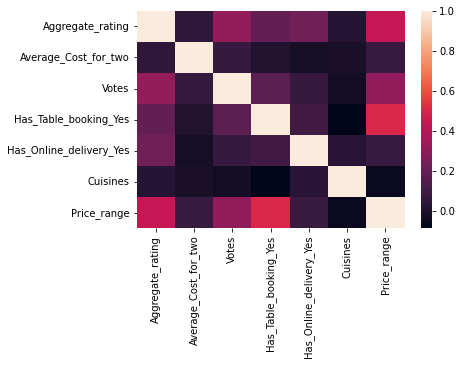

In [101]:
sns.heatmap(f_ratings[['Aggregate_rating','Average_Cost_for_two','Votes','Has_Table_booking_Yes','Has_Online_delivery_Yes','Cuisines','Price_range']].corr())

,Price_range,Aggregate_rating
Price_range,1.000000,0.437874
Aggregate_rating,0.437874,1.000000


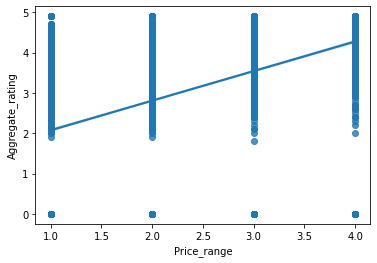

In [102]:
#corr between rating and price range
sns.regplot(x='Price_range',y='Aggregate_rating',data=f_ratings)
f_ratings[["Price_range", "Aggregate_rating"]].corr()

Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

But as compared to others it can be consider as factor affecting but it's intensity is low

,Price_range,Has_Table_booking_Yes
Price_range,1.000000,0.502025
Has_Table_booking_Yes,0.502025,1.000000


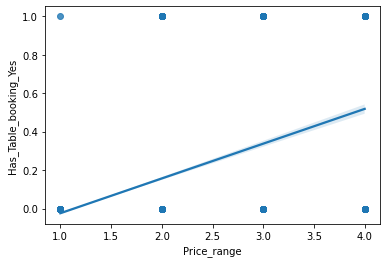

In [103]:
#corr between table booking and price range
sns.regplot(x='Price_range',y='Has_Table_booking_Yes',data=f_ratings)
f_ratings[["Price_range", "Has_Table_booking_Yes"]].corr()

0.5 and 0.7 indicate variables which can be considered moderately correlated.

,Cuisines,Aggregate_rating
Cuisines,1.000000,0.021097
Aggregate_rating,0.021097,1.000000


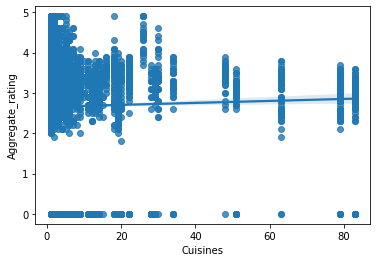

In [104]:
#corr between rating and cuisines
sns.regplot(x='Cuisines',y='Aggregate_rating',data=f_ratings)
f_ratings[['Cuisines','Aggregate_rating']].corr()

,Votes,Aggregate_rating
Votes,1.000000,0.313598
Aggregate_rating,0.313598,1.000000


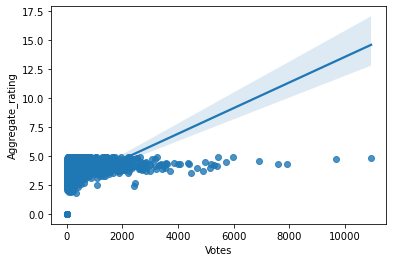

In [105]:
#corr between rating and votes
sns.regplot(x='Votes',y='Aggregate_rating',data=f_ratings)
f_ratings[['Votes','Aggregate_rating']].corr()

,Has_Table_booking_Yes,Aggregate_rating
Has_Table_booking_Yes,1.000000,0.190045
Aggregate_rating,0.190045,1.000000


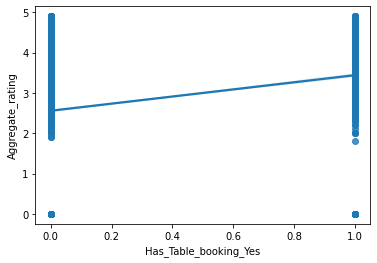

In [106]:
#corr between rating and table booking
sns.regplot(x='Has_Table_booking_Yes',y='Aggregate_rating',data=f_ratings)
f_ratings[['Has_Table_booking_Yes','Aggregate_rating']].corr()

,Has_Online_delivery_Yes,Aggregate_rating
Has_Online_delivery_Yes,1.000000,0.225772
Aggregate_rating,0.225772,1.000000


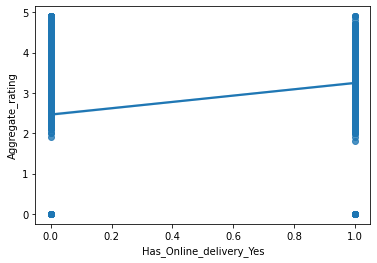

In [107]:
#corr between rating and online delivery
sns.regplot(x='Has_Online_delivery_Yes',y='Aggregate_rating',data=f_ratings)
f_ratings[['Has_Online_delivery_Yes','Aggregate_rating']].corr()

,Aggregate_rating,Votes
Aggregate_rating,1.000000,0.313598
Votes,0.313598,1.000000


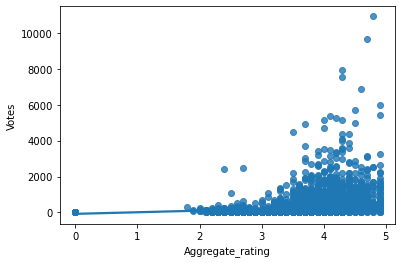

In [108]:
#corr between votes and rating
sns.regplot(x='Aggregate_rating',y='Votes',data=f_ratings)
f_ratings[['Aggregate_rating','Votes']].corr()

Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

,Price_range,Votes
Price_range,1.000000,0.309308
Votes,0.309308,1.000000


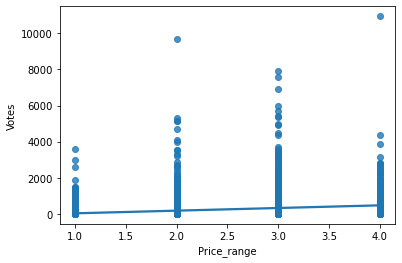

In [109]:
#corr between votes and price range
sns.regplot(x='Price_range',y='Votes',data=f_ratings)
f_ratings[["Price_range", "Votes"]].corr()

In [110]:
f_ratings.to_excel('output.xlsx')

In [111]:
data.to_excel('uloutput.xlsx')

In [116]:
Cuisines_app.to_excel('Cuisines_ap.xlsx')

In [120]:
max_cuisines.to_excel('cumax.xlsx')

#### A correlation coefficient of +1 indicates a perfect positive correlation. As variable x increases, variable y increases. As variable x decreases, variable y decreases. A correlation coefficient of -1 indicates a perfect negative correlation.

#### Dashboarding:

Visualize the variables using Tableau to help user explore the data and create a better understanding of the restaurants to identify the ‘’star’’ restaurant

Demonstrate  the variables associated with each other and factors to build a dashboard

https://public.tableau.com/app/profile/rushikesh.khankar/viz/Tabprofina22/Dashboard2?publish=yes